# Automated Planning for Business Professionals

This notebook demonstrates automated planning concepts through practical business examples. It includes visualizations, code examples, and business-focused scenarios to help professionals understand and apply planning concepts.

## Table of Contents
1. [Introduction](#intro)
2. [State Space Representation](#state)
3. [Planning Algorithms](#algorithms)
4. [Manufacturing Planning Example](#manufacturing)
5. [Supply Chain Challenge](#challenge)

Let's start by importing the required libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from typing import Dict, List, Tuple, Set
import random
from dataclasses import dataclass

# Configure matplotlib for better notebook display
%matplotlib inline


## Introduction to Automated Planning <a name="intro"></a>

Automated planning is a branch of AI that focuses on finding sequences of actions that lead from an initial state to a goal state. In business contexts, this can help with:

- Resource allocation optimization
- Process scheduling
- Supply chain management
- Production planning

Let's start with a function that introduces these concepts:

In [ ]:
def print_introduction():
    """Print introduction to automated planning concepts"""
    print("""
    Automated Planning in Business
    ============================

    What is Automated Planning?
    - Finding sequences of actions that lead from an initial state to a goal state
    - Used for optimizing business processes and resource allocation
    - Helps make decisions in complex business environments

    Key Benefits for Business:
    1. Optimized resource allocation
    2. Improved operational efficiency
    3. Better decision making
    4. Reduced costs
    5. Increased productivity
    """)

print_introduction()


    Automated Planning in Business
    
    What is Automated Planning?
    - Finding sequences of actions that lead from an initial state to a goal state
    - Used for optimizing business processes and resource allocation
    - Helps make decisions in complex business environments
    
    Key Benefits for Business:
    1. Optimized resource allocation
    2. Improved operational efficiency
    3. Better decision making
    4. Reduced costs
    5. Increased productivity
    


## State Space Representation <a name="state"></a>

In automated planning, we need to represent:
1. The current state of the business system
2. Available actions and their requirements
3. Effects of actions on the state

Let's implement this using a business resource planning example:

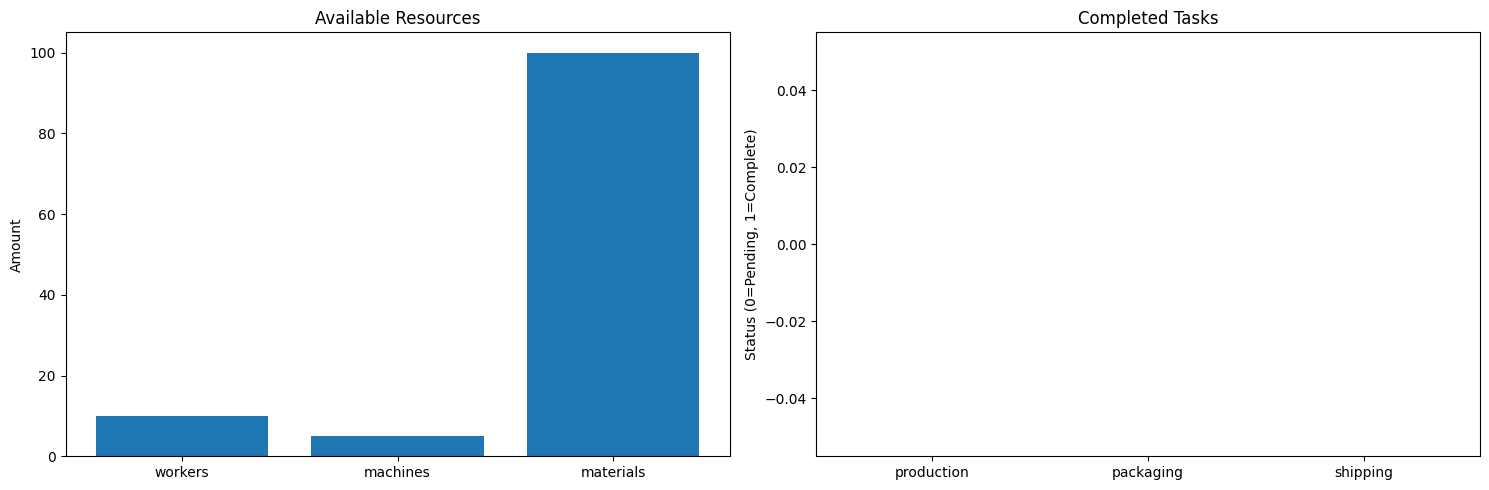

In [ ]:
@dataclass
class BusinessState:
    """Represents a business state with resources and tasks"""
    resources: Dict[str, int]  # Available resources
    tasks_completed: Set[str]  # Completed tasks
    current_step: int  # Current planning step

class BusinessPlanner:
    """Business planning system for resource allocation and task scheduling"""

    def __init__(self):
        self.resources = {
            'workers': 10,
            'machines': 5,
            'materials': 100
        }
        self.tasks = {
            'production': {'workers': 2, 'machines': 1, 'materials': 10},
            'packaging': {'workers': 1, 'machines': 1, 'materials': 5},
            'shipping': {'workers': 2, 'machines': 0, 'materials': 2}
        }
        self.initial_state = BusinessState(
            resources=self.resources.copy(),
            tasks_completed=set(),
            current_step=0
        )

    def is_action_valid(self, state: BusinessState, task: str) -> bool:
        """Check if a task can be performed given current resources"""
        requirements = self.tasks[task]
        for resource, amount in requirements.items():
            if state.resources[resource] < amount:
                return False
        return True

    def apply_action(self, state: BusinessState, task: str) -> BusinessState:
        """Apply task effects to current state"""
        if not self.is_action_valid(state, task):
            raise ValueError(f"Task {task} cannot be performed with current resources")

        new_resources = state.resources.copy()
        requirements = self.tasks[task]

        # Consume resources
        for resource, amount in requirements.items():
            new_resources[resource] -= amount

        new_tasks = state.tasks_completed.copy()
        new_tasks.add(task)

        return BusinessState(
            resources=new_resources,
            tasks_completed=new_tasks,
            current_step=state.current_step + 1
        )

    def visualize_state(self, state: BusinessState):
        """Visualize current business state"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Plot resources
        resources = list(state.resources.keys())
        values = list(state.resources.values())
        ax1.bar(resources, values)
        ax1.set_title('Available Resources')
        ax1.set_ylabel('Amount')

        # Plot tasks completion
        tasks = list(self.tasks.keys())
        completed = [1 if task in state.tasks_completed else 0 for task in tasks]
        ax2.bar(tasks, completed)
        ax2.set_title('Completed Tasks')
        ax2.set_ylabel('Status (0=Pending, 1=Complete)')

        plt.tight_layout()
        plt.show()

# Create and visualize initial state
planner = BusinessPlanner()
planner.visualize_state(planner.initial_state)

## Planning Algorithms <a name="algorithms"></a>

Now let's implement a simple forward planning algorithm that can generate a sequence of tasks while respecting resource constraints:

Generated plan: ['production', 'packaging', 'shipping']


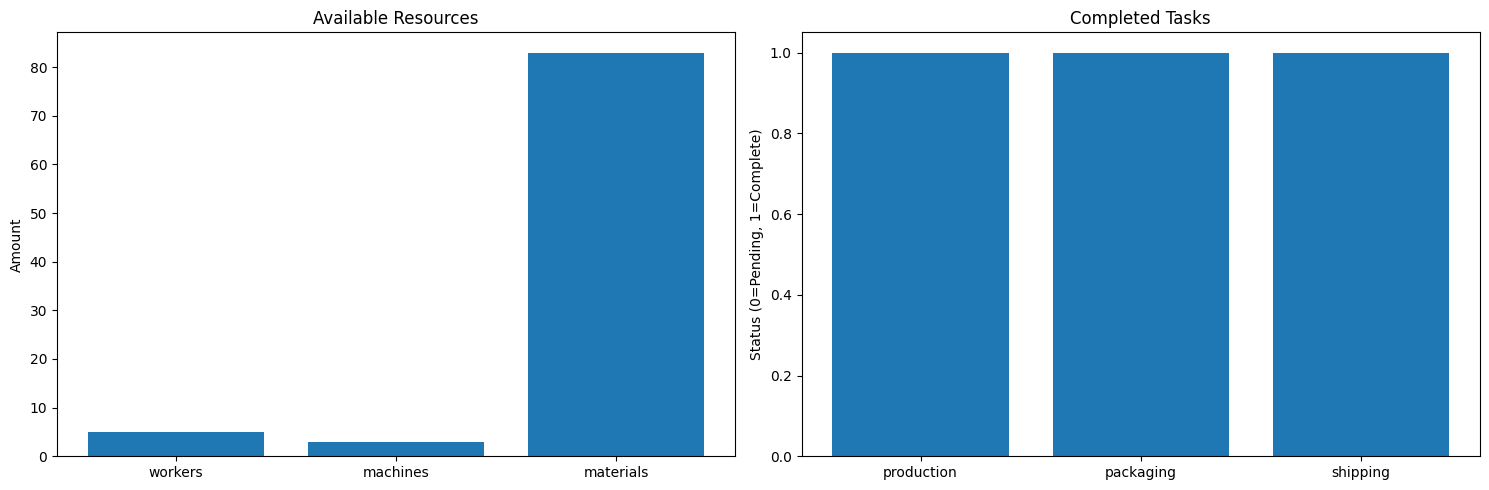

In [ ]:
def simple_forward_planning(planner: BusinessPlanner, max_steps: int = 5) -> List[str]:
    """Implement a simple forward planning algorithm for business tasks"""
    current_state = planner.initial_state
    plan = []

    while len(current_state.tasks_completed) < len(planner.tasks) and current_state.current_step < max_steps:
        # Find next possible task
        for task in planner.tasks:
            if task not in current_state.tasks_completed and planner.is_action_valid(current_state, task):
                current_state = planner.apply_action(current_state, task)
                plan.append(task)
                break
        else:
            break  # No valid tasks found

    return plan

# Generate and display a plan
plan = simple_forward_planning(planner)
print("Generated plan:", plan)

# Visualize final state after executing plan
final_state = planner.initial_state
for task in plan:
    final_state = planner.apply_action(final_state, task)
planner.visualize_state(final_state)

## Manufacturing Planning Example <a name="manufacturing"></a>

Let's look at a more specific business example: planning a manufacturing production schedule while considering worker constraints:

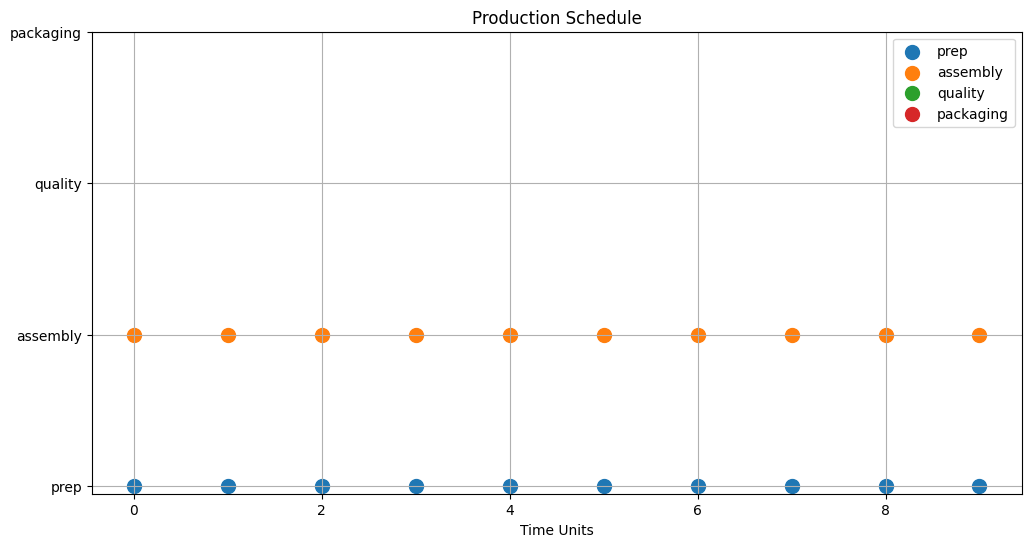

In [ ]:
class ManufacturingPlanner:
    """Example of automated planning in manufacturing"""

    def __init__(self):
        self.production_line = {
            'prep': {'time': 2, 'workers': 2},
            'assembly': {'time': 3, 'workers': 3},
            'quality': {'time': 1, 'workers': 1},
            'packaging': {'time': 2, 'workers': 2}
        }
        self.total_workers = 5
        self.max_time = 10

    def generate_schedule(self) -> Dict[str, List[int]]:
        """Generate an optimized production schedule"""
        schedule = {task: [] for task in self.production_line}
        current_time = 0
        available_workers = self.total_workers

        while current_time < self.max_time:
            for task, requirements in self.production_line.items():
                if (requirements['workers'] <= available_workers and
                    len(schedule[task]) < self.max_time):
                    schedule[task].append(current_time)
                    available_workers -= requirements['workers']
            current_time += 1
            available_workers = self.total_workers

        return schedule

    def visualize_schedule(self, schedule: Dict[str, List[int]]):
        """Visualize the production schedule"""
        fig, ax = plt.subplots(figsize=(12, 6))

        tasks = list(schedule.keys())
        for i, task in enumerate(tasks):
            times = schedule[task]
            ax.scatter([t for t in times], [i] * len(times),
                      label=task, s=100)

        ax.set_yticks(range(len(tasks)))
        ax.set_yticklabels(tasks)
        ax.set_xlabel('Time Units')
        ax.set_title('Production Schedule')
        ax.grid(True)
        plt.legend()
        plt.show()

# Create and run manufacturing planner
mfg_planner = ManufacturingPlanner()
schedule = mfg_planner.generate_schedule()
mfg_planner.visualize_schedule(schedule)

Constraint-based manufacturing schedule via Google OR-Tools

In [ ]:
!pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


Optimized Schedule: {'prep': [0, 1], 'assembly': [2, 3, 4], 'quality': [5], 'packaging': [6, 7]}


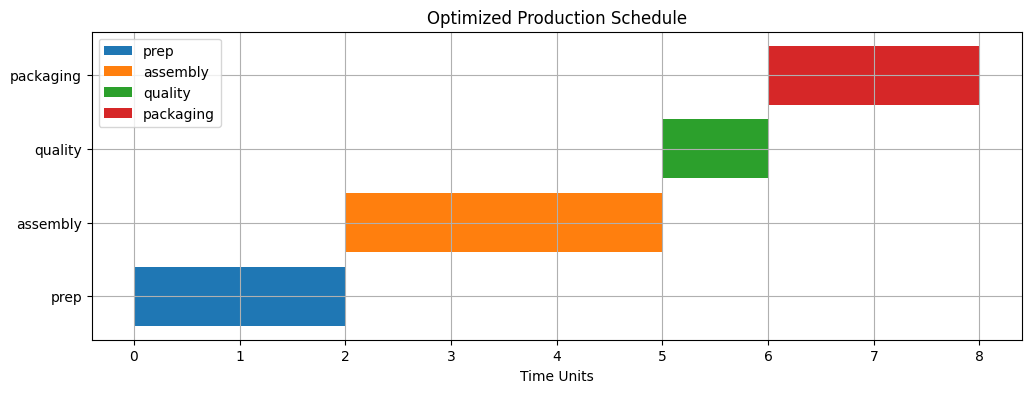

In [ ]:
from ortools.sat.python import cp_model
from typing import Dict, List
import matplotlib.pyplot as plt

class ManufacturingPlanner:
    """Constraint-based manufacturing scheduler"""

    def __init__(self):
        self.tasks = {
            'prep': {'duration': 2, 'workers': 2},
            'assembly': {'duration': 3, 'workers': 3},
            'quality': {'duration': 1, 'workers': 1},
            'packaging': {'duration': 2, 'workers': 2}
        }
        self.total_workers = 5
        self.horizon = 10  # Max timeline

    def generate_schedule(self) -> Dict[str, List[int]]:
        """Optimize task scheduling using CP-SAT"""
        model = cp_model.CpModel()

        # Variables
        starts = {task: model.NewIntVar(0, self.horizon, f'start_{task}')
                 for task in self.tasks}
        ends = {task: model.NewIntVar(0, self.horizon, f'end_{task}')
               for task in self.tasks}

        # Task durations
        for task, params in self.tasks.items():
            model.Add(ends[task] == starts[task] + params['duration'])

        # Precedence constraints
        model.Add(starts['assembly'] >= ends['prep'])
        model.Add(starts['quality'] >= ends['assembly'])
        model.Add(starts['packaging'] >= ends['quality'])

        # Worker capacity (correct cumulative constraint)
        intervals = []
        demands = []
        for task, params in self.tasks.items():
            interval = model.NewIntervalVar(
                starts[task],
                params['duration'],
                ends[task],
                f'interval_{task}'
            )
            intervals.append(interval)
            demands.append(params['workers'])

        model.AddCumulative(intervals, demands, self.total_workers)

        # Solve
        solver = cp_model.CpSolver()
        status = solver.Solve(model)

        # Extract schedule
        schedule = {task: [] for task in self.tasks}
        if status == cp_model.OPTIMAL:
            for task in self.tasks:
                start = solver.Value(starts[task])
                schedule[task] = list(range(start, start + self.tasks[task]['duration']))
        return schedule

    def visualize_schedule(self, schedule: Dict[str, List[int]]):
        """Gantt-style visualization"""
        fig, ax = plt.subplots(figsize=(12, 4))
        colors = plt.cm.tab10.colors

        for i, (task, times) in enumerate(schedule.items()):
            for t in times:
                ax.broken_barh([(t, 1)], (i-0.4, 0.8),
                              facecolors=colors[i], label=task)

        ax.set_yticks(range(len(self.tasks)))
        ax.set_yticklabels(self.tasks.keys())
        ax.set_xlabel('Time Units')
        ax.set_title('Optimized Production Schedule')
        ax.grid(True)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())
        plt.show()

# Run planner
planner = ManufacturingPlanner()
schedule = planner.generate_schedule()
print("Optimized Schedule:", schedule)
planner.visualize_schedule(schedule)

Relatively more complex task scheduling with OR-Tools

In [ ]:
from ortools.sat.python import cp_model

def main():
    # Define tasks and durations (in hours)
    tasks = {
        'TaskA': 2,
        'TaskB': 3,
        'TaskC': 4,
        'TaskD': 1,
        'TaskE': 5,
    }

    # Define dependencies (must finish before start)
    dependencies = [
        ('TaskA', 'TaskC'),  # TaskA must finish before TaskC starts
        ('TaskB', 'TaskE'),  # TaskB must finish before TaskE starts
        ('TaskD', 'TaskE'),  # TaskD must finish before TaskE starts
        ('TaskA', 'TaskB'),
        ('TaskA', 'TaskD'),
        ('TaskA', 'TaskE'),
    ]

    # Create CP model
    model = cp_model.CpModel()

    # Variables: Start time for each task
    starts = {task: model.NewIntVar(0, 100, f'start_{task}') for task in tasks}
    ends = {task: model.NewIntVar(0, 100, f'end_{task}') for task in tasks}

    # Intervals (duration constraints)
    intervals = {
        task: model.NewIntervalVar(
            starts[task], tasks[task], ends[task], f'interval_{task}'
        )
        for task in tasks
    }

    # Single worker: No overlapping tasks
    model.AddNoOverlap(intervals.values())

    # Dependency constraints
    for before, after in dependencies:
        model.Add(ends[before] <= starts[after])

    # Find all possible solutions
    solver = cp_model.CpSolver()
    solution_printer = AllSolutionsPrinter(tasks, starts, ends)

    # solver.parameters.random_seed = 42
    solver.parameters.enumerate_all_solutions = False
    status = solver.Solve(model, solution_printer)

    print(f"Found {solution_printer.count} valid schedules.")

class AllSolutionsPrinter(cp_model.CpSolverSolutionCallback):
    def __init__(self, tasks, starts, ends):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.tasks = tasks
        self.starts = starts
        self.ends = ends
        self.count = 0

    def on_solution_callback(self):
        self.count += 1
        print(f"\nSchedule #{self.count}:")
        # Sort tasks by start time
        scheduled_tasks = sorted(
            self.tasks.keys(),
            key=lambda t: self.Value(self.starts[t])
        )
        for task in scheduled_tasks:
            start = self.Value(self.starts[task])
            end = self.Value(self.ends[task])
            print(f"{task}: {start}h → {end}h")

if __name__ == '__main__':
    main()


Schedule #1:
TaskA: 0h → 2h
TaskB: 2h → 5h
TaskD: 5h → 6h
TaskE: 6h → 11h
TaskC: 49h → 53h
Found 1 valid schedules.


OR-Tools' CP-SAT solver is optimized for finding valid solutions quickly, not for enumerating all possible permutations. It uses:

- **Smart heuristics** to jump between solutions

- **Randomization** to avoid getting stuck

- **Implicit symmetry** breaking that skips equivalent solutions


**The topological approach** is **better** when you need **exhaustive enumeration** of valid sequences.**

To generate all valid task permutations that respect your dependency constraints, we need to:

- Model the problem to represent dependencies as a directed acyclic graph (DAG)

- Generate all topological sorts of the DAG (these are your valid schedules)

- Filter out invalid permutations that violate constraints

In [ ]:
from graphlib import TopologicalSorter

tasks = {'TaskA': 2, 'TaskB': 3, 'TaskC': 4, 'TaskD': 1, 'TaskE': 5}
dependencies = [
    ('TaskA', 'TaskC'),
    ('TaskB', 'TaskE'),
    ('TaskD', 'TaskE'),
    ('TaskA', 'TaskB'),
    ('TaskA', 'TaskD'),
    ('TaskA', 'TaskE'),
]

# Build the dependency graph CORRECTLY
graph = {task: set() for task in tasks}
for before, after in dependencies:
    graph[before].add(after)  # "before" must come before "after"

def get_all_topological_sorts(graph):
    # Calculate in-degree for each node
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1

    result = []

    def backtrack(path, in_degree):
        if len(path) == len(graph):
            result.append(path.copy())
            return

        # Find all nodes with zero in-degree
        for node in graph:
            if in_degree[node] == 0 and node not in path:
                # Choose this node next
                path.append(node)
                # Reduce in-degree for neighbors
                for neighbor in graph[node]:
                    in_degree[neighbor] -= 1

                # Recurse
                backtrack(path, in_degree)

                # Backtrack
                path.pop()
                for neighbor in graph[node]:
                    in_degree[neighbor] += 1

    backtrack([], in_degree)
    return result

valid_schedules = get_all_topological_sorts(graph)

for i, schedule in enumerate(valid_schedules, 1):
    print(f"Valid Schedule {i}: {' → '.join(schedule)}")

Valid Schedule 1: TaskA → TaskB → TaskC → TaskD → TaskE
Valid Schedule 2: TaskA → TaskB → TaskD → TaskC → TaskE
Valid Schedule 3: TaskA → TaskB → TaskD → TaskE → TaskC
Valid Schedule 4: TaskA → TaskC → TaskB → TaskD → TaskE
Valid Schedule 5: TaskA → TaskC → TaskD → TaskB → TaskE
Valid Schedule 6: TaskA → TaskD → TaskB → TaskC → TaskE
Valid Schedule 7: TaskA → TaskD → TaskB → TaskE → TaskC
Valid Schedule 8: TaskA → TaskD → TaskC → TaskB → TaskE


In [ ]:
from collections import deque

# Define tasks and dependencies
tasks = ['TaskA', 'TaskB', 'TaskC', 'TaskD', 'TaskE']
dependencies = [
    ('TaskA', 'TaskC'),
    ('TaskB', 'TaskE'),
    ('TaskD', 'TaskE'),
    ('TaskA', 'TaskB'),
    ('TaskA', 'TaskD'),
    ('TaskA', 'TaskE'),
]

# Build the dependency graph (adjacency list)
graph = {task: [] for task in tasks}
in_degree = {task: 0 for task in tasks}

for before, after in dependencies:
    graph[before].append(after)
    in_degree[after] += 1

# 1. BFS Traversal (Level Order)
def bfs_traversal():
    print("BFS Traversal (Level Order):")
    visited = set()
    queue = deque([task for task in tasks if in_degree[task] == 0])

    while queue:
        node = queue.popleft()
        print(node, end=" → ")
        visited.add(node)

        for neighbor in graph[node]:
            if neighbor not in visited:
                queue.append(neighbor)

    print("\n" + "-"*50)

# 2. DFS Traversal
def dfs_traversal():
    print("DFS Traversal:")
    visited = set()
    stack = [task for task in tasks if in_degree[task] == 0]

    while stack:
        node = stack.pop()
        if node not in visited:
            print(node, end=" → ")
            visited.add(node)
            # Push children in reverse order to process left-to-right
            for neighbor in reversed(graph[node]):
                if neighbor not in visited:
                    stack.append(neighbor)

    print("\n" + "-"*50)

# 3. Topological Sort (All Valid Schedules)
def topological_sort():
    print("All Valid Topological Sorts:")

    def backtrack(path, current_in_degree):
        if len(path) == len(tasks):
            print(" → ".join(path))
            return

        for node in tasks:
            if current_in_degree[node] == 0 and node not in path:
                # Choose this node next
                path.append(node)
                # Reduce in-degree for neighbors
                for neighbor in graph[node]:
                    current_in_degree[neighbor] -= 1

                # Recurse
                backtrack(path, current_in_degree.copy())

                # Backtrack
                path.pop()
                for neighbor in graph[node]:
                    current_in_degree[neighbor] += 1

    backtrack([], in_degree.copy())
    print("-"*50)

# Visualize the dependency tree
def print_dependency_tree():
    print("Dependency Tree Structure:")
    print("        TaskA")
    print("     /    |   \\")
    print(" TaskB  TaskD  TaskC")
    print("    \\    /")
    print("     TaskE")
    print("-"*50)

# Run all traversals
print_dependency_tree()
bfs_traversal()
dfs_traversal()
topological_sort()

Dependency Tree Structure:
        TaskA
     /    |   \
 TaskB  TaskD  TaskC
    \    /
     TaskE
--------------------------------------------------
BFS Traversal (Level Order):
TaskA → TaskC → TaskB → TaskD → TaskE → TaskE → TaskE → 
--------------------------------------------------
DFS Traversal:
TaskA → TaskC → TaskB → TaskE → TaskD → 
--------------------------------------------------
All Valid Topological Sorts:
TaskA → TaskB → TaskC → TaskD → TaskE
TaskA → TaskB → TaskD → TaskC → TaskE
TaskA → TaskB → TaskD → TaskE → TaskC
TaskA → TaskC → TaskB → TaskD → TaskE
TaskA → TaskC → TaskD → TaskB → TaskE
TaskA → TaskD → TaskB → TaskC → TaskE
TaskA → TaskD → TaskB → TaskE → TaskC
TaskA → TaskD → TaskC → TaskB → TaskE
--------------------------------------------------


In [ ]:
from ortools.sat.python import cp_model

# Initialize the model
model = cp_model.CpModel()

# Define tasks with their durations and resource requirements
tasks = {
    'design': {'duration': 3, 'engineers': 2, 'designers': 1},
    'prototype': {'duration': 4, 'engineers': 1, 'technicians': 2},
    'testing': {'duration': 2, 'engineers': 1, 'testers': 2},
    'software': {'duration': 5, 'engineers': 3, 'developers': 2},
    'hardware': {'duration': 3, 'engineers': 1, 'technicians': 3},
    'integration': {'duration': 2, 'engineers': 2, 'testers': 1, 'developers': 1},
    'documentation': {'duration': 3, 'writers': 2, 'designers': 1},
    'final_testing': {'duration': 2, 'testers': 3, 'engineers': 1},
}

# Available resources
resources = {
    'engineers': 3,
    'designers': 2,
    'technicians': 3,
    'testers': 3,
    'developers': 2,
    'writers': 2,
}

# Variables: start times for each task
horizon = 30  # Maximum project duration
starts = {t: model.NewIntVar(0, horizon, f'start_{t}') for t in tasks}
ends = {t: model.NewIntVar(0, horizon, f'end_{t}') for t in tasks}

# Add duration constraints
for t in tasks:
    model.Add(ends[t] == starts[t] + tasks[t]['duration'])

# Add precedence constraints
model.Add(ends['design'] <= starts['prototype'])
model.Add(ends['design'] <= starts['software'])
model.Add(ends['prototype'] <= starts['hardware'])
model.Add(ends['prototype'] <= starts['testing'])
model.Add(ends['testing'] <= starts['integration'])
model.Add(ends['software'] <= starts['integration'])
model.Add(ends['hardware'] <= starts['integration'])
model.Add(ends['integration'] <= starts['documentation'])
model.Add(ends['integration'] <= starts['final_testing'])

# Create CP model and print the output

